# Part 1: Data Preprocessing

dataset link: [Breast Cancer Wisconsin](https://www.kaggle.com/uciml/breast-cancer-wisconsin-data)

## Importing the libraries and dataset

In [167]:
import sklearn
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [168]:
dataset = pd.read_csv('./data.csv')

In [169]:
dataset.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


## Dealing dataset

In [170]:
dataset = dataset.drop(labels="Unnamed: 32", axis=1)

In [171]:
dataset.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [172]:
for i in range(0, dataset.shape[0]):
    if dataset.iloc[i, 1] == 'M':
        dataset.iloc[i, 1] = 1
    else:
        dataset.iloc[i, 1] = 0

In [173]:
dataset.head(20)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.26540,0.4601,0.11890
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.18600,0.2750,0.08902
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.24300,0.3613,0.08758
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.25750,0.6638,0.17300
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.16250,0.2364,0.07678
5,843786,1,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,...,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.17410,0.3985,0.12440
6,844359,1,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,...,22.88,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.19320,0.3063,0.08368
7,84458202,1,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,...,17.06,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.15560,0.3196,0.11510
8,844981,1,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,...,15.49,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.20600,0.4378,0.10720
9,84501001,1,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,...,15.09,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.22100,0.4366,0.20750


## Splitting the training data and testing data

In [174]:
x_set = dataset.iloc[:, 2:].values

In [175]:
y_set = dataset.iloc[:, 1].values

In [176]:
x_set.shape, y_set.shape

((569, 30), (569,))

In [177]:
x_train, x_test, y_train, y_test = train_test_split(x_set, y_set, test_size=0.3)

In [178]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((398, 30), (171, 30), (398,), (171,))

## Feature scaling

In [179]:
sc = StandardScaler()

In [180]:
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [181]:
x_train

array([[ 0.29611086,  1.25375167,  0.39280329, ...,  1.30158496,
         1.85559392,  0.75777279],
       [-0.8722565 , -0.69303152, -0.90704625, ..., -1.16310822,
        -0.83963817, -0.7134539 ],
       [ 1.18989788, -0.49047604,  1.16221   , ...,  0.7522183 ,
        -0.63142985,  0.53074139],
       ...,
       [ 0.05795445,  0.11719039,  0.07079233, ...,  1.01853178,
         3.04582415,  0.89156855],
       [-0.71815529, -0.79430926, -0.70268531, ..., -0.28488247,
        -0.14943579, -0.21777745],
       [-0.32589766, -0.89783761, -0.28989251, ..., -0.67020002,
         0.47354973, -0.13402341]])

In [182]:
x_test

array([[-1.27768277, -0.08086386, -1.29052833, ..., -1.19323969,
        -0.56257355, -0.27255997],
       [-0.73776817, -0.8280685 , -0.70390659, ..., -0.09694124,
        -0.17730619, -0.53225018],
       [ 0.62112432,  0.09243361,  0.6736978 , ...,  1.31832466,
         0.26042311,  0.56972126],
       ...,
       [-0.17459829,  0.79462593, -0.22638592, ..., -0.68678755,
        -0.41502435, -0.78193205],
       [-0.83863441, -1.10714494, -0.87000074, ..., -1.52483801,
        -0.131402  , -0.53699098],
       [ 2.52917749,  0.52680257,  2.41605797, ...,  1.79160176,
         1.13752114,  0.3948386 ]])

# Part 2: Building the model

## Logistic regression

$g(z) = \frac{1}{1 + e^{-z}}$

In [183]:
def sigmoid(x):
  return 1 / (1 + np.exp(-x.astype(float)))

$f_{w,b}(x) = \widehat{y} = g(w \cdot x + b)= \frac{1}{1 + e^{-(w \cdot x + b)}}$

In [184]:
def model(x, w, b):
  out = sigmoid(np.dot(x, w) + b)
  return out

$J(w,b) = -\frac{1}{m} \displaystyle\sum_{i = 1}^{m} [y^{(i)} \log{(f_{w,b}(x^{(i)}))} + (1 - y^{(i)})\log{(1 - f_{w,b}(x^{(i)}))}]$

In [185]:
# Binary cross entropy
def bce_loss(yhat, y):
    m = len(y)
    eps = 1e-9
    return -np.sum(y * np.log(yhat + eps) + (1 - y) * np.log(1 - yhat + eps)) / m

$\frac{\partial}{\partial w} J(w,b) = \frac{1}{m} \displaystyle\sum_{i = 1}^{m} (f_{w,b}(x^{(i)}) - y^{(i)})x^{(i)}$

$\frac{\partial}{\partial b} J(w,b) = \frac{1}{m} \displaystyle\sum_{i = 1}^{m} (f_{w,b}(x^{(i)}) - y^{(i)})$

In [186]:
def gradient(x, y_hat, y):
  m = len(y)
  grad_w = np.dot(x.T, y_hat-y) / m
  grad_b = np.sum(y_hat-y) / m
  return grad_w, grad_b

In [187]:
def train_model(x, y, n_epoch=50000, lr=1e-3):
  m, d = x.shape
  w = np.zeros(d)
  b = np.zeros(1)

  for epoch in range(n_epoch):
    y_hat = model(x, w, b)
    loss = bce_loss(y_hat, y)
    
    grad_w, grad_b = gradient(x, y_hat, y)

    w = w - lr * grad_w
    b = b - lr * grad_b

    if epoch % (n_epoch/100) == 0 or epoch == n_epoch-1:
      print(f"epoch {epoch}: train_loss = {loss:.4f}")

  return w, b

In [188]:
w_optim, b_optim = train_model(x_train, y_train)

epoch 0: train_loss = 0.6931
epoch 500: train_loss = 0.3328
epoch 1000: train_loss = 0.2525
epoch 1500: train_loss = 0.2148
epoch 2000: train_loss = 0.1921
epoch 2500: train_loss = 0.1767
epoch 3000: train_loss = 0.1653
epoch 3500: train_loss = 0.1566
epoch 4000: train_loss = 0.1496
epoch 4500: train_loss = 0.1439
epoch 5000: train_loss = 0.1391
epoch 5500: train_loss = 0.1349
epoch 6000: train_loss = 0.1313
epoch 6500: train_loss = 0.1282
epoch 7000: train_loss = 0.1254
epoch 7500: train_loss = 0.1229
epoch 8000: train_loss = 0.1206
epoch 8500: train_loss = 0.1185
epoch 9000: train_loss = 0.1166
epoch 9500: train_loss = 0.1149
epoch 10000: train_loss = 0.1133
epoch 10500: train_loss = 0.1118
epoch 11000: train_loss = 0.1104
epoch 11500: train_loss = 0.1091
epoch 12000: train_loss = 0.1079
epoch 12500: train_loss = 0.1067
epoch 13000: train_loss = 0.1057
epoch 13500: train_loss = 0.1046
epoch 14000: train_loss = 0.1037
epoch 14500: train_loss = 0.1028
epoch 15000: train_loss = 0.1019
e

In [189]:
def test_trained_model(x_test, y_test, w, b):
  y_hat = model(x_test, w, b)
  loss = bce_loss(y_hat, y_test)
  print(f"test_loss = {loss:.4f}")

In [190]:
test_trained_model(x_test, y_test, w_optim, b_optim)

test_loss = 0.0518


In [191]:
def accuracy(y_hat, y, threshold):
    print(threshold)
    acc = 0
    for i in range(len(y)):
        if y[i] == 1:
            if y_hat[i] >= threshold:
                acc += 1
        else:
            if y_hat[i] < threshold:
                acc += 1
    return acc / len(y) * 100

In [192]:
y_hat = model(x_test, w_optim, b_optim)

In [193]:
y_hat

array([3.00262827e-04, 8.29056196e-03, 9.84991482e-01, 3.49673643e-03,
       2.96518346e-03, 1.42263736e-02, 2.55310238e-04, 1.49781056e-03,
       8.44015608e-01, 7.16662992e-05, 9.87378418e-01, 9.99998102e-01,
       9.66796871e-02, 1.56004121e-03, 6.19998158e-02, 9.96238020e-01,
       7.67862381e-06, 1.18401815e-04, 1.65983867e-03, 2.56007210e-04,
       9.36229962e-01, 5.14668782e-02, 9.99961937e-01, 3.00821095e-03,
       2.18771219e-03, 3.62431910e-02, 8.17144601e-01, 1.25568135e-02,
       2.07484888e-03, 5.04190472e-03, 7.18388509e-01, 2.29070159e-04,
       2.10771883e-03, 1.20292439e-01, 7.44834664e-02, 4.25732876e-04,
       1.16793316e-02, 9.99999862e-01, 9.99998880e-01, 2.00331511e-02,
       1.17190046e-03, 9.99967063e-01, 1.16078362e-04, 2.32072058e-02,
       1.57222534e-04, 9.99979440e-01, 2.80903415e-03, 4.03094537e-03,
       4.25938668e-03, 2.74711212e-03, 2.50456641e-02, 7.91912946e-01,
       9.87523096e-01, 9.99999834e-01, 9.44442896e-04, 9.99287862e-01,
      

In [194]:
accuracy(y_hat, y_test, 0.9)

0.9


94.73684210526315

In [195]:
thresholds = np.arange(0.1,0.9, step = 0.1)
acc = np.zeros_like(thresholds)
for i, threshold in enumerate(thresholds):
    acc[i] = accuracy(y_hat, y_test, threshold)
    print(threshold, acc[i]) 

0.1
0.1 95.90643274853801
0.2
0.2 96.49122807017544
0.30000000000000004
0.30000000000000004 99.41520467836257
0.4
0.4 99.41520467836257
0.5
0.5 98.83040935672514
0.6
0.6 98.24561403508771
0.7000000000000001
0.7000000000000001 98.24561403508771
0.8
0.8 96.49122807017544


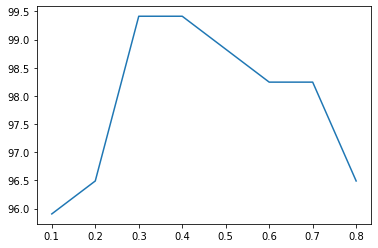

In [196]:
plt.plot(thresholds, acc)